# Subject : Fraud Analytics Using Predictive and Social Network Techniques
# Course code : CS6890

## Assignment Number 2: Example Dependent Cost Sensitive Classification

### Group Members  
- **CS24MTECH14003** Anurag Sarva  
- **CS24MTECH14006** Gulshan Hatzade  
- **CS24MTECH14018** Mainak Adhikari  

## Importing needed librarys



In [1]:
# Import necessary modules
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler  # For normalizing data
from sklearn.model_selection import train_test_split  # For splitting dataset
from sklearn.linear_model import LogisticRegression  # Standard Logistic Regression model
from scipy.optimize import differential_evolution  # Optimization for cost-sensitive model
import matplotlib.pyplot as plt  # Visualization of results
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, GridSearchCV  # Added GridSearchCV
from tabulate import tabulate
from sklearn.preprocessing import StandardScaler


## Loading dataset from a csv


In [2]:
# Load dataset from CSV file
dataset = pd.read_csv('costsensitiveregression - costsensitiveregression.csv')

# Display first few records to confirm data loading
dataset.head()


,NotCount,YesCount,ATPM,PFD,PFG,SFD,SFG,WP,WS,AH,AN,Status,FNC
0,2,21,0.0,0.000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0,0.0
1,23,0,0.0,0.044,0.0,0.0,0.0,0.306179,0.0,0.0,0.0,1,0.0
2,1,22,0.0,0.000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0,0.0
3,5,18,0.0,0.000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1,0.0
4,1,22,0.0,0.000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0,0.0


## Getting dataset information  


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147636 entries, 0 to 147635
Data columns (total 13 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   NotCount  147636 non-null  int64  
 1   YesCount  147636 non-null  int64  
 2   ATPM      147636 non-null  float64
 3   PFD       147636 non-null  float64
 4   PFG       147636 non-null  float64
 5   SFD       147636 non-null  float64
 6   SFG       147636 non-null  float64
 7   WP        147636 non-null  float64
 8   WS        147636 non-null  float64
 9   AH        147636 non-null  float64
 10  AN        147636 non-null  float64
 11  Status    147636 non-null  int64  
 12  FNC       147636 non-null  float64
dtypes: float64(10), int64(3)
memory usage: 14.6 MB


## Counting rows having status 1 and 0  

- We is counting how many times **Status** column have value `1` and `0`.  
- A `while` loop is used to go through all rows one by one.  
- `ones` keep track of count where **Status = 1**, `zeros` count where **Status = 0**.  
- At last, we print a counts.  


In [4]:
# Counting occurrences of 1s and 0s in 'Status' column using a while loop
count_ones = 0
count_zeros = 0
index = 0  # Starting index

status_list = dataset['Status'].to_numpy()  # Convert to NumPy array for efficiency
total_entries = len(status_list)  # Get total row count

# Loop through each row to count occurrences
while index < total_entries:
    if status_list[index] == 1:
        count_ones += 1
    else:
        count_zeros += 1
    index += 1  # Move to next row

# Display the results
print("Total rows with Status = 1:", count_ones)
print("Total rows with Status = 0:", count_zeros)




Total rows with Status = 1: 44082
Total rows with Status = 0: 103554


## Dividing dataset into input and output columns  

- We is splitting dataset into **independent variables** (features) and **dependent variable** (target).  
- `X` will have all columns **except** `Status`, which is the target.  
- `y` will store **only** `Status` column, which we is predicting.  
- After splitting, we checking summary of `X` using `describe()` to see range of values in dataset.  


In [5]:
# Separating input features (independent variables) and target variable (dependent variable)
features = dataset.drop(columns=['Status'])  # Remove target column
target = dataset['Status']  # Store target values separately

# Display statistical summary of input features
features.describe()


,NotCount,YesCount,ATPM,PFD,PFG,SFD,SFG,WP,WS,AH,AN,FNC
count,147636.000000,147636.000000,147636.000000,147636.000000,147636.000000,147636.000000,147636.000000,147636.000000,147636.000000,147636.000000,147636.000000,1.476360e+05
mean,7.722107,15.220908,0.253245,0.027062,0.050789,0.021648,0.071709,0.271927,0.493587,0.045045,0.013474,5.334049e+02
std,7.574278,7.596921,0.366280,0.335509,0.373370,0.298285,1.135755,2.432425,0.763389,0.182274,0.100973,8.774011e+03
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,2.000000,10.000000,0.001084,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.820820e-01
50%,4.000000,19.000000,0.033354,0.000000,0.000000,0.000000,0.000000,0.000000,0.097875,0.000000,0.000000,1.183562e+01
75%,13.000000,21.000000,0.394372,0.000000,0.000000,0.000000,0.000000,0.061840,0.880929,0.000000,0.000000,1.069840e+02
max,23.000000,22.000000,1.000000,79.837480,51.944780,61.556900,209.021870,399.606420,5.000000,1.000000,1.000000,1.703186e+06


## Normalizing dataset with Min-Max Scaling  

- We using `MinMaxScaler()` to scale data between **0 and 1**.  
- It helps to making model work better by keeping values in same range.  
- We is **excluding** `FNC` column from scaling because it is a cost value.  
- After scaling, dataset is updated and first rows is displayed using `head()`.  


In [6]:
from sklearn.preprocessing import MinMaxScaler  # Import scaling function

# Create MinMaxScaler instance
normalizer = MinMaxScaler()

# Select all feature columns except 'FNC' for scaling
scaled_columns = [column for column in features.columns if column != 'FNC']

# Apply normalization to the selected columns
features[scaled_columns] = normalizer.fit_transform(features[scaled_columns])

# Show the first few rows after scaling
features.head()



,NotCount,YesCount,ATPM,PFD,PFG,SFD,SFG,WP,WS,AH,AN,FNC
0,0.086957,0.954545,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,1.000000,0.000000,0.0,0.000551,0.0,0.0,0.0,0.000766,0.0,0.0,0.0,0.0
2,0.043478,1.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.217391,0.818182,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.043478,1.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


## Splitting dataset into train and test  

- We dividing dataset into **training** and **testing** parts using `train_test_split()`.  
- `test_size = 0.3` mean 30% of data is used for testing, 70% for training.  
- `random_state = 42` is set to make sure same split happens everytime.  
- **False Negative Cost (FNC)** column is **separated** from feature set before training model.  
- `FNC` is saved **separately** for both training and testing set.  


In [ ]:
# Split dataset into training and testing sets (30% test data)
X_train, X_test, y_train, y_test = train_test_split(features, np.array(target), test_size=0.3, random_state=42)

# Extract 'FNC' column separately before training
train_false_neg_cost = np.array(X_train['FNC'])  # Store FNC for training data
X_train = np.array(X_train.drop(columns=['FNC']))  # Remove FNC from training features

test_false_neg_cost = np.array(X_test['FNC'])  # Store FNC for testing data
X_test = np.array(X_test.drop(columns=['FNC']))  # Remove FNC from testing features



## Function for checking model performace  

- This function is calculating **accuracy** and **misclassification cost**.  
- It is using a `while` loop to go through each prediction and compare with real value.  
- **If prediction is correct**, accuracy counter go up.  
- **If wrong**, cost is added depend on error type:  
  - **False Positive (FP) or True Positive (TP)** → Fixed cost of `3`.  
  - **False Negative (FN)** → Varies, depend on `fnc` value.  
- At end, function **returns** accuracy and total cost.  


In [8]:
def compute_metrics(pred_labels, true_labels, false_neg_costs):
    """Calculate accuracy and misclassification cost"""

    correct_preds = 0  # Track correct predictions
    total_cost = 0  # Track total misclassification cost
    idx = 0  # Loop index

    while idx < len(pred_labels):
        if pred_labels[idx] == true_labels[idx]:
            correct_preds += 1  # Increase accuracy count
            if pred_labels[idx] == 1:
                total_cost += 3  # True Positive Cost
        else:
            if pred_labels[idx] == 1:
                total_cost += 3  # False Positive Cost
            else:
                total_cost += false_neg_costs[idx]  # False Negative Cost
        idx += 1  # Move to next prediction

    return correct_preds / len(pred_labels), total_cost  # Return accuracy and total cost


## Function for showing model result  

- This function is taking **train and test accuracy** and **cost values** as inputs.  
- It is print a accuracy and cost of both **training** and **testing** dataset.  
- **Accuracy** tell how much correct prediction model is doing.  
- **Cost** show how expensive errors is in terms of misclassification.  
- This function help to understanding model performance easily.  


In [9]:
def display_results(train_acc, train_expense, test_acc, test_expense):
    """Prints the evaluation metrics of the model"""

    print(f"Training Accuracy: {train_acc:.4f}")
    print(f"Training Total Cost: {train_expense:.2f}")
    print(f"Testing Accuracy: {test_acc:.4f}")
    print(f"Testing Total Cost: {test_expense:.2f}")


## Standard Logistic Regression model at offset of 0.5

- We is creating a **Logistic Regression** model and training it using `fit()`.  
- Model is trained on **X_train** and **y_train**, where `X_train` is features and `y_train` is labels.  
- After training, model is **predicting** labels for both **train** and **test** dataset.  
- Prediction is **converted** into class labels (`0` or `1`) based on threshold `0.5`.  
- We using `compute_metrics()` to calculate:  
  - **Accuracy** - How many correct predictions model is making.  
  - **Cost** - Total misclassification cost.  
- Results is printed using `display_results()`.  
- Average cost **per sample** is calculated to see cost efficiency.  
- Train and test cost is **stored in list** for future comparison.  


In [10]:
# Train a standard Logistic Regression model
log_model = LogisticRegression()  # Initialize classifier
log_model.fit(X_train, y_train)  # Train on training dataset

# Generate predictions for training data
train_predictions = log_model.predict(X_train)
train_predictions = (train_predictions >= 0.5).astype(int)  # Convert probabilities to binary labels
train_acc, train_total_cost = compute_metrics(train_predictions, y_train, train_false_neg_cost)

# Generate predictions for testing data
test_predictions = log_model.predict(X_test)
test_predictions = (test_predictions >= 0.5).astype(int)  # Convert probabilities to binary labels
test_acc, test_total_cost = compute_metrics(test_predictions, y_test, test_false_neg_cost)

print("Standard Logistic Regression - Evaluation at Default Offset (0.5)\n")

# Print evaluation results
display_results(train_acc, train_total_cost, test_acc, test_total_cost)

# Calculate and print cost per sample
train_avg_cost = train_total_cost / len(y_train)
test_avg_cost = test_total_cost / len(y_test)
# print(f"Total Training Cost: {train_total_cost:.2f}")
# print(f"Total Testing Cost: {test_total_cost:.2f}")
print(f"Avg Traing Cost : {train_avg_cost:.4f}")
print(f"Avg Testing Cost : {test_avg_cost:.4f}")

# Store cost results for comparison
training_cost_list = [train_total_cost]
testing_cost_list = [test_total_cost]


Standard Logistic Regression - Evaluation at Default Offset (0.5)

Training Accuracy: 0.8664
Training Total Cost: 3069710.37
Testing Accuracy: 0.8653
Testing Total Cost: 1295595.04
Avg Traing Cost : 29.7035
Avg Testing Cost : 29.2519


## Compute Accuracy and Cost for Different Offsets  

- This part is used for **testing multiple probability thresholds** (offsets).  
- `offsets` is a list of values between **0 and 1** to adjust decision boundary.  
- **Empty lists** is created for storing:  
  - **Accuracy and cost** for both training and testing.  
  - **Cost per sample** to check efficiency of each offset.  
- For **each offset value**:  
  1. **Standard Logistic Regression**:  
     - Convert probability to class labels using `>= offset`.  
     - Compute **accuracy** and **misclassification cost** using `compute_metrics()`.  
     - Store values in respective lists.  
  
- These results is later used for **plotting cost vs offset graph**.  


In [11]:
# Generate probability predictions for both models
train_probs_logreg = log_model.predict_proba(X_train)[:, 1]  # Standard Logistic Regression (Train)
test_probs_logreg = log_model.predict_proba(X_test)[:, 1]  # Standard Logistic Regression (Test)


# Create diff  offset values
offsets = np.linspace(0.01, 0.99, 100)

# Initialize lists to store misclassification costs
logreg_train_costs, logreg_test_costs = [], []
bahnsen_train_costs, bahnsen_test_costs = [], []

# Lists to store accuracy and misclassification costs for different thresholds
logreg_train_costs, logreg_test_costs = [], []

logreg_train_acc, logreg_test_acc = [], []


# Lists for cost per sample calculation
logreg_train_cps, logreg_test_cps = [], []


# Iterate over different offset values to analyze their impact
for threshold in offsets:
    # Standard Logistic Regression
    train_pred_labels = (train_probs_logreg >= threshold).astype(int)
    accuracy, total_cost = compute_metrics(train_pred_labels, y_train, train_false_neg_cost)
    logreg_train_acc.append(accuracy)
    logreg_train_costs.append(total_cost)
    logreg_train_cps.append(total_cost / len(y_train))

    test_pred_labels = (test_probs_logreg >= threshold).astype(int)
    accuracy, total_cost = compute_metrics(test_pred_labels, y_test, test_false_neg_cost)
    logreg_test_acc.append(accuracy)
    logreg_test_costs.append(total_cost)
    logreg_test_cps.append(total_cost / len(y_test))



## Display Offset Values  

- `offsets` is a list of **probability threshold values** .  
- It is used for adjusting the **classification decision boundary**.  
- This command print **all offset values** to check if they is correctly generated before plotting.  


In [12]:

# Display all offset threshold values
print("Threshold values being tested:", offsets)


Threshold values being tested: [0.01       0.01989899 0.02979798 0.03969697 0.04959596 0.05949495
 0.06939394 0.07929293 0.08919192 0.09909091 0.1089899  0.11888889
 0.12878788 0.13868687 0.14858586 0.15848485 0.16838384 0.17828283
 0.18818182 0.19808081 0.2079798  0.21787879 0.22777778 0.23767677
 0.24757576 0.25747475 0.26737374 0.27727273 0.28717172 0.29707071
 0.3069697  0.31686869 0.32676768 0.33666667 0.34656566 0.35646465
 0.36636364 0.37626263 0.38616162 0.39606061 0.4059596  0.41585859
 0.42575758 0.43565657 0.44555556 0.45545455 0.46535354 0.47525253
 0.48515152 0.49505051 0.50494949 0.51484848 0.52474747 0.53464646
 0.54454545 0.55444444 0.56434343 0.57424242 0.58414141 0.5940404
 0.60393939 0.61383838 0.62373737 0.63363636 0.64353535 0.65343434
 0.66333333 0.67323232 0.68313131 0.6930303  0.70292929 0.71282828
 0.72272727 0.73262626 0.74252525 0.75242424 0.76232323 0.77222222
 0.78212121 0.7920202  0.80191919 0.81181818 0.82171717 0.83161616
 0.84151515 0.85141414 0.8613131

# Cost Graphs for Logistic Regression

This script generates two cost graphs for Logistic Regression:  
1. **Train Avg Cost vs. Offset**  
2. **Test Avg Cost vs. Offset**  

Optimal Offset: 0.0298
Average Train Cost: 41.2111
Average Test Cost: 39.2580


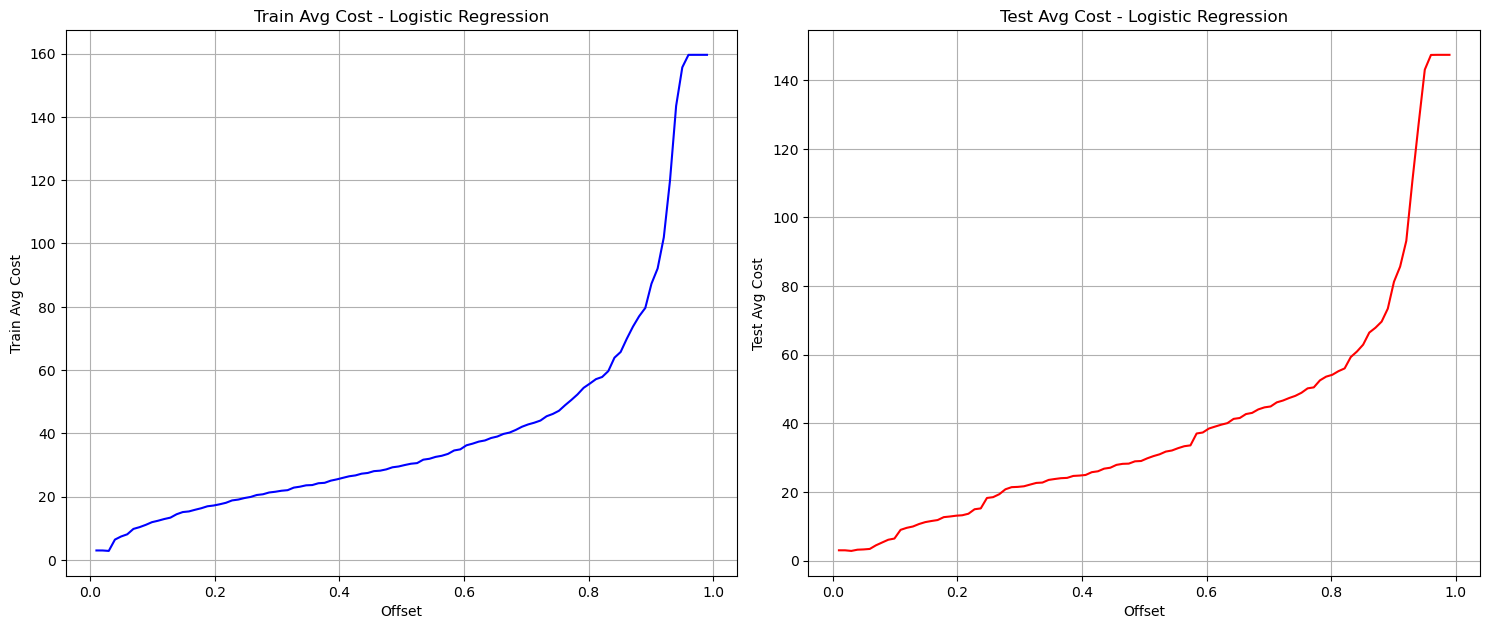

In [13]:
# Create a figure to plot all four cost graphs
plt.figure(figsize=(15, 12))

# Graph 1: Train Avg Cost - Logistic Regression
plt.subplot(2, 2, 1)
plt.plot(offsets, logreg_train_cps, color='blue')
plt.xlabel('Offset')
plt.ylabel('Train Avg Cost')
plt.title('Train Avg Cost - Logistic Regression')
plt.grid(True)

# Graph 2: Test Avg Cost - Logistic Regression
plt.subplot(2, 2, 2)
plt.plot(offsets, logreg_test_cps, color='red')
plt.xlabel('Offset')
plt.ylabel('Test Avg Cost')
plt.title('Test Avg Cost - Logistic Regression')
plt.grid(True)

'''
# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()'''
# Find optimal offset (offset that minimizes test cost)
optimal_index = np.argmin(logreg_test_cps)
optimal_offset = offsets[optimal_index]
optimal_train_avg_cost = logreg_train_cps[optimal_index]
optimal_test_avg_cost = logreg_test_cps[optimal_index]

# Print results
print(f"Optimal Offset: {optimal_offset:.4f}")

average_train_cost = np.mean(logreg_train_cps)
average_test_cost = np.mean(logreg_test_cps)

# Print the results
print(f"Average Train Cost: {average_train_cost:.4f}")
print(f"Average Test Cost: {average_test_cost:.4f}")
# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

# Cost-Sensitive Logistic Regression using Bahnsen's Approach

This script implements a **cost-sensitive logistic regression model** inspired by Bahnsen's approach, where the cost of false negatives and false positives is explicitly considered. The model tunes hyperparameters and threshold values to minimize total classification cost.

---

## Features Implemented:
1. **Data Preprocessing**
   - Standardization of input features using `StandardScaler`.
   
2. **Custom Cost Function**
   - Calculates the cost of predictions based on penalties for false positives (FP) and false negatives (FN).
   - Rewards true positives (TP) and true negatives (TN).

3. **Custom Logistic Regression Model**
   - A `BahnsenLogisticRegression` class with:
     - Cost-aware training using sample weights.
     - Threshold tuning for decision-making.

4. **Grid Search for Hyperparameter Optimization**
   - `GridSearchCV` optimizes the regularization parameter **C**.

5. **Threshold Optimization**
   - Searches for an optimal decision threshold that minimizes classification cost.

6. **Cost vs. Threshold Plot**
   - Visualizes cost reduction over different decision thresholds.

# Data Preprocessing: Feature Scaling and Splitting

This script preprocesses the dataset by scaling features, splitting the data into training and testing sets, and further separating specific columns for cost-sensitive learning.



In [14]:
from sklearn.preprocessing import StandardScaler

# Feature Scaling with StandardScaler
scaler = StandardScaler()
scaled_columns = [column for column in features.columns if column != 'FNC']
features[scaled_columns] = scaler.fit_transform(features[scaled_columns])


# Further split training set into train and validation for threshold tuning
X_train, X_val, y_train, y_val, FN_train, FN_val = train_test_split(
    X_train, y_train, train_false_neg_cost, test_size=0.3, random_state=42
)

# Implementing a Bahnsen Logistic Regression Model

This code does followings steps:

1. **Data Standardization:**  
   - Using a `StandardScaler` to normalize train, validation, and test data.  
   - It ensure features have a mean of 0 and a standard deviation of 1.  

2. **Cost Computation Functions:**  
   - `compute_cost()` calculates a total and average cost for misclassification.  
   - `determine_cost()` assigns a penalty for false positives and false negatives.  

3. **Bahnsen Logistic Regression Class:**  
   - It modifies standard logistic regression by using cost-sensitive learning.  
   - Allows setting threshold dynamically for predictions.  
   - Implements a grid search for best hyperparameter tuning.  

4. **Utility Functions:**  
   - `compute_sample_weights()`: Adjusts sample weights depend on false negative cost.  
   - `perform_grid_search()`: Finds best regularization parameter using grid search.  
   - `apply_threshold()`: Converts probabilities into binary predictions based on threshold.  
   - `opti_thres()`: Finds the best decision threshold minimize average cost.  

This method make logistic regression more cost-sensitive and useful for imbalance dataset.


In [ ]:

# Standardize features so they have mean = 0, std = 1
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit scaler to train data and transform it
X_val = scaler.transform(X_val)  # Transform validation set using same scaler
X_test = scaler.transform(X_test)  # Transform test set using same scaler

def compute_cost(y_actual, y_predicted, fn_cost_values, fp_penalty=3, tp_reward=3, tn_reward=0):
    """
    Compute total and average misclassification cost.

    Parameters:
    y_actual: True labels of data
    y_predicted: Model predictions
    fn_cost_values: Cost for false negatives (row-specific)
    fp_penalty: Cost of false positive misclassification (default 3)
    tp_reward: Reward for true positive (default 3)
    tn_reward: Reward for true negative (default 0)

    Returns:
    total cost and average cost
    """
    total_costs = np.zeros(len(y_actual))  # Store cost for each sample
    index = 0  # Loop variable

    while index < len(y_actual):  # Iterate over each sample
        actual, predicted = y_actual[index], y_predicted[index]
        total_costs[index] = determine_cost(actual, predicted, fn_cost_values[index], fp_penalty, tp_reward, tn_reward)
        index += 1  # Move to next index

    return total_costs.sum(), total_costs.mean()  # Return sum and mean cost

def determine_cost(actual, predicted, fn_cost, fp_penalty, tp_reward, tn_reward):
    """
    Compute cost depend on prediction type.

    Parameters:
    actual: True label
    predicted: Model output
    fn_cost: False negative penalty (vary per sample)
    fp_penalty: False positive penalty
    tp_reward: Reward for true positive
    tn_reward: Reward for true negative

    Returns:
    Cost value for the sample
    """
    if predicted == 1:
        return tp_reward if actual == 1 else fp_penalty  # If predicted positive, return TP reward or FP penalty
    return fn_cost if actual == 1 else tn_reward  # If predicted negative, return FN penalty or TN reward

class BahnsenLogisticRegression:
    def __init__(self, rec, initial_threshold=0.5):
        """
        Initialize Bahnsen Logistic Regression model.

        Parameters:
        rec: False positive penalty
        initial_threshold: Decision threshold for classification (default 0.5)
        """
        self.model = LogisticRegression(solver='saga', class_weight='balanced', max_iter=1000)  # Initialize logistic regression
        self.threshold = initial_threshold  # Set decision threshold
        self.opti_b_l_r = 1.0  # Store best regularization parameter
        self.fp_penalty = rec  # Store false positive penalty

    def fit(self, X, y, cost_weights):
        """
        Train model using cost-sensitive logistic regression.

        Parameters:
        X: Training features
        y: Training labels
        cost_weights: Cost-sensitive sample weights

        Returns:
        Trained model
        """
        wght_b_l_r = compute_sample_weights(y, cost_weights, self.fp_penalty)  # Compute sample weights
        self.model, self.opti_b_l_r = perform_grid_search(self.model, X, y, wght_b_l_r)  # Train using grid search
        return self

    def predict_proba(self, X):
        """
        Predict probabilities for given features.

        Parameters:
        X: Input feature matrix

        Returns:
        Predicted probabilities
        """
        return self.model.predict_proba(X)  # Return probability estimates

    def set_threshold(self, threshold):
        """
        Set custom classification threshold.

        Parameters:
        threshold: Threshold value to use
        """
        self.threshold = threshold  # Update threshold

    def predict(self, X):
        """
        Make predictions using stored threshold.

        Parameters:
        X: Input feature matrix

        Returns:
        Binary predictions (0 or 1)
        """
        probabilities = self.predict_proba(X)[:, 1]  # Get probability of positive class
        return apply_threshold(probabilities, self.threshold)  # Apply threshold to make final prediction

def compute_sample_weights(y, cost_weights, rec):
    """
    Compute sample weights based on false negative cost.

    Parameters:
    y: True labels
    cost_weights: Cost values for false negatives
    rec: False positive penalty

    Returns:
    Weight array
    """
    return np.where(y == 1, cost_weights, rec)  # Assign FN cost to positives, FP penalty to negatives

def perform_grid_search(model, X, y, wght_b_l_r):
    """
    Perform grid search to find best regularization parameter.

    Parameters:
    model: Logistic regression model
    X: Training features
    y: Training labels
    wght_b_l_r: Sample weights

    Returns:
    Best model and optimal regularization parameter
    """
    grid_par_b_l_r = {'C': [0.001, 0.01, 0.1, 1]}  # Define regularization values to search
    search_grid_b_l_r = GridSearchCV(model, grid_par_b_l_r, cv=5, scoring='neg_log_loss')  # Set up grid search
    search_grid_b_l_r.fit(X, y, sample_weight=wght_b_l_r)  # Fit model with grid search
    return search_grid_b_l_r.best_estimator_, search_grid_b_l_r.best_params_['C']  # Return best model and best C value

def apply_threshold(probabilities, threshold):
    """
    Convert probability scores to binary predictions.

    Parameters:
    probabilities: Probability estimates
    threshold: Decision threshold

    Returns:
    Binary predictions (0 or 1)
    """
    return (probabilities >= threshold).astype(int)  # Apply threshold

def opti_thres(model, X_val, y_val, FN_val, FP_cost=3):
    """
    Optimize threshold to minimize average cost.

    Parameters:
    model: Trained model
    X_val: Validation feature set
    y_val: Validation labels
    FN_val: False negative costs for validation set
    FP_cost: Cost of false positives (default 3)

    Returns:
    Best threshold and its corresponding average cost
    """
    best_cost, best_threshold = float('inf'), 0.5  # Initialize best cost and threshold
    thresholds = np.linspace(0.01, 0.99, 100)  # Generate threshold values from 0.01 to 0.99
    index = 0  # Loop variable

    while index < len(thresholds):  # Iterate over all thresholds
        threshold = thresholds[index]
        model.set_threshold(threshold)  # Update model threshold
        preds = model.predict(X_val)  # Make predictions
        total_cost, avg_cost = compute_cost(y_val, preds, FN_val, FP_cost)  # Compute cost

        if avg_cost < best_cost:  # Update best threshold if lower cost found
            best_cost, best_threshold = avg_cost, threshold

        index += 1  # Move to next threshold

    model.set_threshold(best_threshold)  # Set optimal threshold in model
    return best_threshold, best_cost  # Return best threshold and cost
print("\nBahnsen Logistic Regression Model:")

bahnsen_model = BahnsenLogisticRegression(rec=3)

# Train model using training data and false negative costs
bahnsen_model.fit(X_train, y_train, FN_train)




Bahnsen Logistic Regression Model:


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max

# Plotting Cost vs Threshold for Bahnsen Logistic Regression

This function plots a relation between threshold and average cost for a model. It helps finding a best threshold where cost is minimized. The function do the following:

- **First**, it iterates over a range of thresholds from 0.01 to 0.99.
- **Then**, it compute the training and testing costs at each threshold.
- **Next**, it find a optimal threshold where testing cost is lowest.
- **Then**, it plots two graphs:
  - **Training Avg Cost vs Threshold** (Blue)
  - **Testing Avg Cost vs Threshold** (Red)
- **Finally**, it create a table comparing Standard Logistic Regression with Bahnsen Logistic Regression. It include:
  - Best Offset
  - Train Avg Cost
  - Test Avg Cost
  - Train-Test Cost Difference

This approach help in cost-sensitive classification where false positives and false negatives have different penalties.


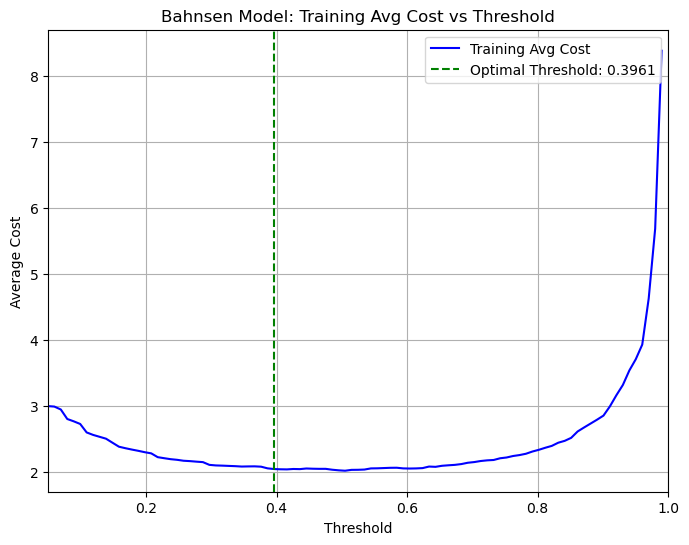

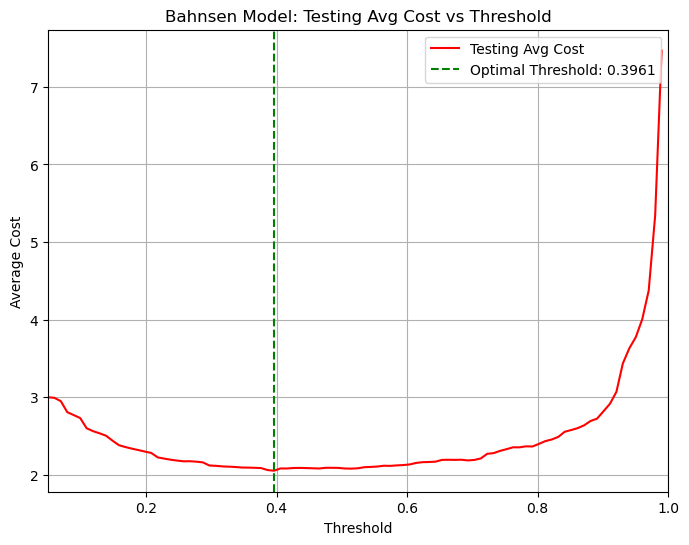

Optimal Threshold: 0.3961, Minimum Avg Cost: 2.0504
                          Model  Best Offset  Train Avg Cost  Test Avg Cost  \
0  Standard Logistic Regression     0.029798       41.211112      39.257993   
1   Bahnsen Logistic Regression     0.396061        2.044602       2.050430   

   Train-Test Cost Diff  
0              0.034437  
1              0.005828  
+---+------------------------------+----------------------+-------------------+--------------------+----------------------+
|   |            Model             |     Best Offset      |  Train Avg Cost   |   Test Avg Cost    | Train-Test Cost Diff |
+---+------------------------------+----------------------+-------------------+--------------------+----------------------+
| 0 | Standard Logistic Regression | 0.029797979797979796 | 41.21111201279045 | 39.25799298084782  | 0.03443703164721468  |
| 1 | Bahnsen Logistic Regression  | 0.39606060606060606  | 2.044601622772702 | 2.0504300879636945 | 0.00582846519099256  |
+---+-------

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def plotting_2(model, X_train, X_test, y_train, y_test, FN_train, FN_test, model_name):
    # Creating a list of threshold values between 0.01 and 0.99
    thresholds = np.linspace(0.01, 0.99, 100)
    train_costs, test_costs = [], []  # Storing train and test cost
    best_threshold, best_avg_cost = 0, float('inf')  # Initalizing best values

    # Looping through all threshold to find a best one
    for threshold in thresholds:
        model.set_threshold(threshold)  # Setting model threshold
        train_pred = model.predict(X_train)  # Predicting on train dataset
        test_pred = model.predict(X_test)  # Predicting on test dataset
        avg_cost = compute_cost(y_test, test_pred, FN_test)[1]  # Compute avg test cost

        train_cost = compute_cost(y_train, train_pred, FN_train)[1]  # Compute avg train cost
        train_costs.append(train_cost)  # Store train cost
        test_costs.append(avg_cost)  # Store test cost

        # Updating best threshold if a lower avg cost found
        if avg_cost < best_avg_cost:
            best_avg_cost = avg_cost
            best_threshold = threshold
            best_train_cost = train_cost  # Store train cost at this threshold

    # Plot for Training Avg Cost vs Threshold
    plt.figure(figsize=(8, 6))
    plt.plot(thresholds, train_costs, 'b-', label='Training Avg Cost')  # Plot training cost
    plt.axvline(x=best_threshold, color='g', linestyle='--', label=f'Optimal Threshold: {best_threshold:.4f}')  # Mark best threshold
    plt.xlabel('Threshold')
    plt.ylabel('Average Cost')
    plt.title(f'{model_name}: Training Avg Cost vs Threshold')
    plt.xlim(0.05, 1)
    
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot for Testing Avg Cost vs Threshold
    plt.figure(figsize=(8, 6))
    plt.plot(thresholds, test_costs, 'r-', label='Testing Avg Cost')  # Plot testing cost
    plt.axvline(x=best_threshold, color='g', linestyle='--', label=f'Optimal Threshold: {best_threshold:.4f}')  # Mark best threshold
    plt.xlabel('Threshold')
    plt.ylabel('Average Cost')
    plt.title(f'{model_name}: Testing Avg Cost vs Threshold')
    plt.xlim(0.05, 1)
    
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f'Optimal Threshold: {best_threshold:.4f}, Minimum Avg Cost: {best_avg_cost:.4f}')

    # Compute cost difference (Train - Test)
    train_test_cost_diff_bl = best_avg_cost - best_train_cost  # Cost diff for Bahnsen model
    train_test_cost_diff_lr =   optimal_train_avg_cost -optimal_test_avg_cost # Cost diff for Logistic Regression

    # Creating a table for comparing both model
    comparison_data = {
        "Model": ["Standard Logistic Regression", "Bahnsen Logistic Regression"],
        "Best Offset": [optimal_offset, best_threshold],  # Best threshold for both models
        "Train Avg Cost": [average_train_cost, best_train_cost],  # Train cost for both models
        "Test Avg Cost": [average_test_cost, best_avg_cost],  # Test cost for both models
        "Train-Test Cost Diff": [train_test_cost_diff_lr, train_test_cost_diff_bl]  # Cost diff for both models
    }

    # Convert to DataFrame for better readability
    comparison_df = pd.DataFrame(comparison_data)

    # Print the comparison table
    print(comparison_df)

    # Optional: Pretty print using tabulate if available
    try:
        from tabulate import tabulate
        print(tabulate(comparison_df, headers='keys', tablefmt='pretty'))
    except ImportError:
        pass  # If tabulate not installed, print pandas default table

# Example function call with Bahnsen model
plotting_2(bahnsen_model, X_train, X_test, y_train, y_test, FN_train, test_false_neg_cost, "Bahnsen Model")
